### Preprocessing

In [110]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [2]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
from sklearn.preprocessing import scale
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [7]:
# import data
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/College.csv"
College = pd.read_csv(url, index_col='Unnamed: 0')

In [8]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
College.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [13]:
College = pd.get_dummies(data=College, columns=['Private'], drop_first=True)

In [14]:
College.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


### 10.a. Splitting the data set into a training set and test set and using forward stepwise selection to select best predictors

In [167]:
from sklearn.model_selection import train_test_split
from pygam import LinearGAM
from pygam.terms import gen_edge_knots
from sklearn.ensemble.partial_dependence import plot_partial_dependence

In [20]:
X = College.drop(columns='Outstate')
y = College.Outstate

In [107]:
lmf = LinearRegression()
sfs = SFS(lmf, k_features=(1,len(X.columns)), forward=True, floating=False, scoring='r2',cv=10)

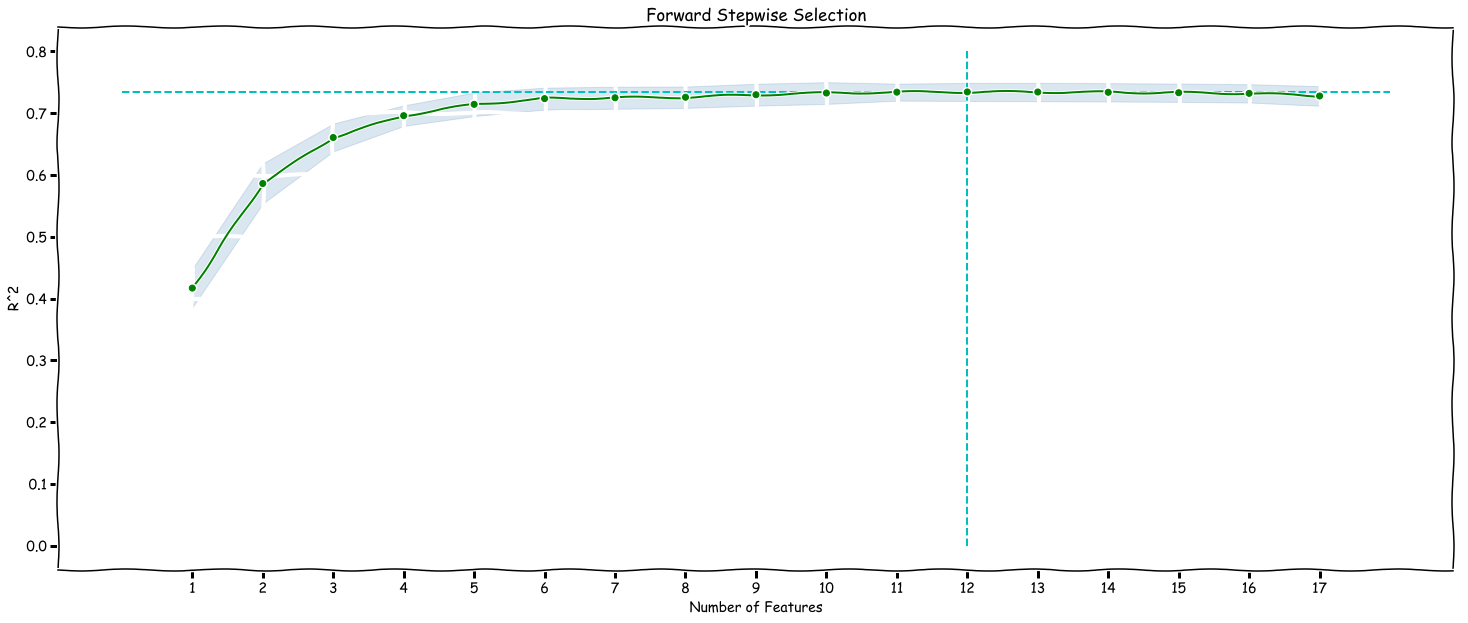

In [108]:
plt.xkcd()
sfs = sfs.fit(X.values, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', color='green')
plt.title('Forward Stepwise Selection')
plt.ylabel('R^2')
plt.grid()
fig = plt.gcf()
fig.set_size_inches(25, 10)
[plt.hlines(0.735 , 0, 18, linestyles='dashed', lw=2, colors='c')]
[plt.vlines(12 , 0, 0.8, linestyles='dashed', lw=2, colors='c')]

**Forward stepwise selection achieves the highest $R^2$ for n=12. This means that the best regression equation will contain 12 features when employing forward stepwise selection.**

In [120]:
feat = sfs.k_feature_idx_
feat_list = pd.DataFrame()
for i in feat:
    print(X.columns[i])
    feat_list = feat_list.append(pd.DataFrame([X.columns[i]]))
feat_list.columns = ['Features']
feat_list.reset_index(inplace=True, drop=True)
feat_list

Apps
Accept
Top10perc
F.Undergrad
Room.Board
Personal
PhD
S.F.Ratio
perc.alumni
Expend
Grad.Rate
Private_Yes


,Features
0,Apps
1,Accept
2,Top10perc
3,F.Undergrad
4,Room.Board
5,Personal
6,PhD
7,S.F.Ratio
8,perc.alumni
9,Expend


**Therefore, the best regressors are 'Apps','Accept', 'Top10perc', 'F.Undergrad', 'Room.Board', 'Personal', 'PhD', 'S.F.Ratio', 'perc.alumni'
, 'Expend', 'Grad.Rate', 'Private(=Yes)''**